In [2]:
import geopandas as gpd
import rasterio
from rasterio.mask import mask
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from shapely.geometry import mapping
from datetime import datetime

now = datetime.now()
print(now)
# Example output: 2025-11-24 14:35:22.123456

2025-11-25 17:01:55.443492


C:\Users\taohuang\AppData\Local\anaconda3\Lib\site-packages\pyogrio\core.py:35: RuntimeWarning: Could not detect GDAL data files.  Set GDAL_DATA environment variable to the correct path.
  _init_gdal_data()
C:\Users\taohuang\AppData\Local\Temp\ipykernel_10400\4128980056.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Polygon", y="Value", data=df, palette="Set3", linewidth=1.5, order = order)


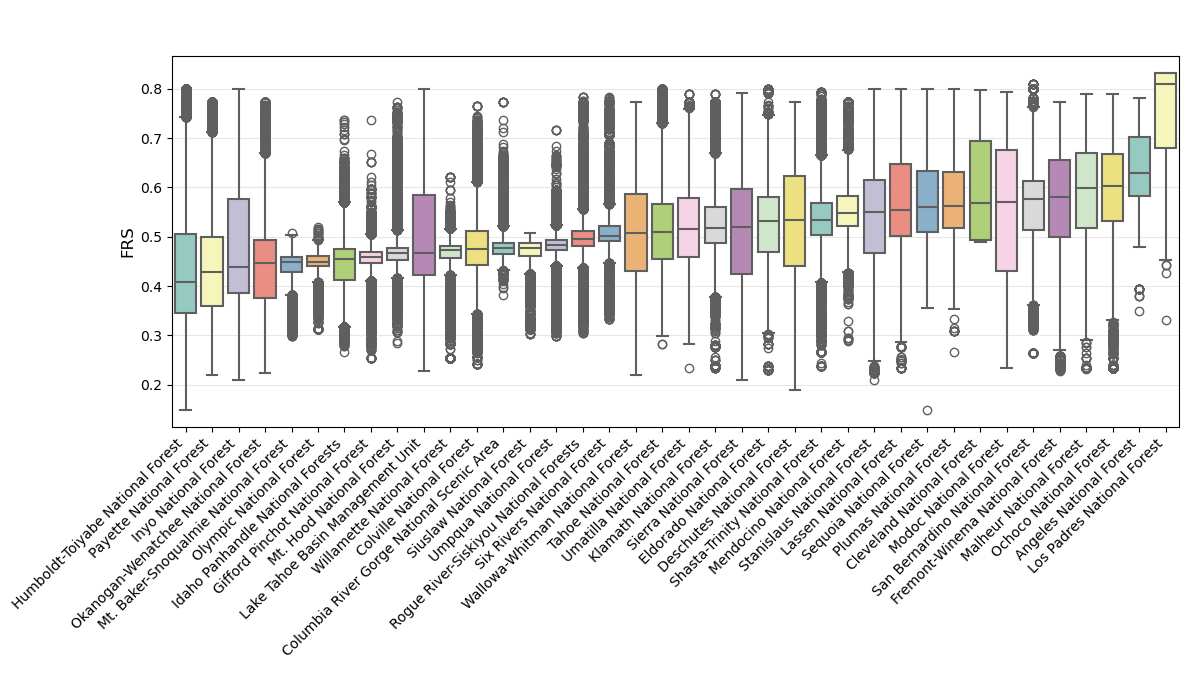


Summary statistics per polygon:
                                            mean    std    min    25%    50%  \
Polygon                                                                        
Angeles National Forest                    0.641  0.078  0.350  0.582  0.630   
Cleveland National Forest                  0.597  0.093  0.489  0.494  0.569   
Columbia River Gorge National Scenic Area  0.486  0.036  0.382  0.466  0.478   
Colville National Forest                   0.475  0.065  0.243  0.444  0.474   
Deschutes National Forest                  0.532  0.119  0.189  0.440  0.534   
Eldorado National Forest                   0.524  0.078  0.231  0.469  0.531   
Fremont-Winema National Forest             0.573  0.105  0.227  0.499  0.580   
Gifford Pinchot National Forest            0.453  0.030  0.255  0.446  0.459   
Humboldt-Toiyabe National Forest           0.441  0.135  0.149  0.346  0.409   
Idaho Panhandle National Forests           0.441  0.057  0.266  0.412  0.455   
Inyo Na

In [2]:
# -----------------------------
# 1. Set your file paths
# -----------------------------
raster_path = r"C:\Users\taohuang\Downloads\frs_spatial.tif" #"data/ndvi_2023.tif"        # Change to your raster
shapefile_path =  r"C:\Users\taohuang\Downloads\westcoast_forests.shp" #"data/sample_polygons.shp"  # Your polygons

# Optional: give nice names (use a column in your shapefile like 'name', 'id', 'class')
label_column = 'FORESTNAME'   # e.g., 'Plot_ID', 'Field', 'Zone', etc. Change accordingly!

# -----------------------------
# 2. Read data
# -----------------------------
gdf = gpd.read_file(shapefile_path)

with rasterio.open(raster_path) as src:
    raster_crs = src.crs
    nodata = src.nodata

# Reproject polygons to raster CRS if needed
if gdf.crs != raster_crs:
    gdf = gdf.to_crs(raster_crs)

# -----------------------------
# 3. Extract values for each polygon
# -----------------------------
data_for_plotting = []

with rasterio.open(raster_path) as src:
    for idx, row in gdf.iterrows():
        try:
            # Crop and mask raster to polygon
            geom = [mapping(row.geometry)]
            out_image, _ = mask(src, geom, crop=True, filled=True, nodata=nodata)
            
            # Extract values (assuming single band; change [0] for multi-band)
            values = out_image[0].ravel()
            
            # Remove nodata and NaN
            if nodata is not None:
                values = values[values != nodata]
            values = values[np.isfinite(values)]
            
            # Get label for this polygon
            label = row[label_column] if label_column in row else f"Poly_{idx}"
            
            # Append to list for plotting
            if len(values) > 0:
                for val in values:
                    data_for_plotting.append({"Polygon": label, "Value": val})
                    
        except Exception as e:
            print(f"Polygon {idx} failed: {e}")

# Convert to DataFrame
df = pd.DataFrame(data_for_plotting)


# Step 1: Compute median per group
medians = df.groupby('Polygon')['Value'].median()   # change 'category' and 'value' to your column names

# Step 2: Get the order (ascending or descending)
order = medians.sort_values(ascending=True).index

# -----------------------------
# 4. Plot boxplot (or violinplot)
# -----------------------------
plt.figure(figsize=(12, 7))

# Option A: Classic boxplot
sns.boxplot(x="Polygon", y="Value", data=df, palette="Set3", linewidth=1.5, order = order)

# Option B: Violinplot (uncomment to use instead)
# sns.violinplot(x="Polygon", y="Value", data=df, palette="muted", inner="quartile")

# Option C: Boxplot + swarmplot (shows individual points)
# sns.boxplot(x="Polygon", y="Value", data=df, palette="Set3", whis=1.5)
# sns.swarmplot(x="Polygon", y="Value", data=df, color="black", alpha=0.6, size=3)

plt.title(" ", fontsize=16, pad=20)
plt.xlabel(" ", fontsize=12)
plt.ylabel("FRS", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# -----------------------------
# 5. (Optional) Save summary statistics
# -----------------------------
summary = df.groupby("Polygon")["Value"].describe()[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
print("\nSummary statistics per polygon:")
print(summary.round(3))

# Save to CSV
#summary.to_csv("polygon_raster_statistics.csv")
#df.to_csv("all_extracted_values.csv", index=False)

C:\Users\taohuang\AppData\Local\Temp\ipykernel_10400\1810869622.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Polygon", y="Value", data=df, palette="Set3", linewidth=1.5, order = order)


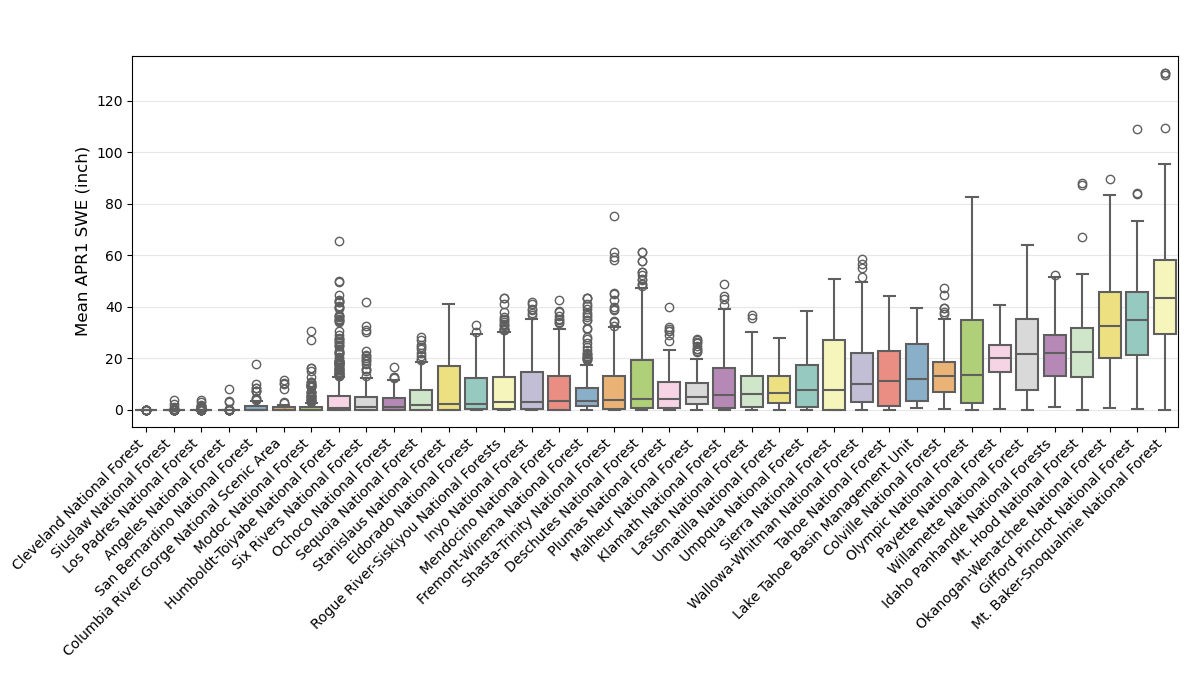


Summary statistics per polygon:
                                             mean     std    min     25%  \
Polygon                                                                    
Angeles National Forest                     0.213   1.056  0.000   0.000   
Cleveland National Forest                   0.008   0.026  0.000   0.000   
Columbia River Gorge National Scenic Area   1.521   3.266  0.000   0.000   
Colville National Forest                   14.238   8.941  0.181   7.045   
Deschutes National Forest                  12.620  16.492  0.000   0.691   
Eldorado National Forest                    7.366   9.406  0.000   0.393   
Fremont-Winema National Forest              6.731   8.576  0.007   1.347   
Gifford Pinchot National Forest            34.557  17.953  0.358  21.145   
Humboldt-Toiyabe National Forest            4.648   8.470  0.000   0.072   
Idaho Panhandle National Forests           21.795  10.402  1.130  13.317   
Inyo National Forest                        9.089  11.3

In [3]:
# -----------------------------
# 1. Set your file paths
# -----------------------------
raster_path = r"C:\Users\taohuang\Downloads\vic_SWE_APR1_19712000_historical_20CMIP5ModelMean.tif"  
ylab = "Mean APR1 SWE (inch)"
shapefile_path =  r"C:\Users\taohuang\Downloads\westcoast_forests.shp" #"data/sample_polygons.shp"  # Your polygons

# Optional: give nice names using a column in your shapefile 
label_column = 'FORESTNAME'   # e.g., 'Plot_ID', 'Field', 'Zone', etc. Change accordingly!

# -----------------------------
# 2. Read data
# -----------------------------
gdf = gpd.read_file(shapefile_path)

with rasterio.open(raster_path) as src:
    raster_crs = src.crs
    nodata = src.nodata

# Reproject polygons to raster CRS if needed
if gdf.crs != raster_crs:
    gdf = gdf.to_crs(raster_crs)

# -----------------------------
# 3. Extract values for each polygon
# -----------------------------
data_for_plotting = []

with rasterio.open(raster_path) as src:
    for idx, row in gdf.iterrows():
        try:
            # Crop and mask raster to polygon
            geom = [mapping(row.geometry)]
            out_image, _ = mask(src, geom, crop=True, filled=True, nodata=nodata)
            
            # Extract values (assuming single band; change [0] for multi-band)
            values = out_image[0].ravel()
            
            # Remove nodata and NaN
            if nodata is not None:
                values = values[values != nodata]
            values = values[np.isfinite(values)]
            
            # Get label for this polygon
            label = row[label_column] if label_column in row else f"Poly_{idx}"
            
            # Append to list for plotting
            if len(values) > 0:
                for val in values:
                    data_for_plotting.append({"Polygon": label, "Value": val})
                    
        except Exception as e:
            print(f"Polygon {idx} failed: {e}")

# Convert to DataFrame
df = pd.DataFrame(data_for_plotting)


# Step 1: Compute median per group
medians = df.groupby('Polygon')['Value'].median()   # change 'category' and 'value' to your column names

# Step 2: Get the order (ascending or descending)
order = medians.sort_values(ascending=True).index

# -----------------------------
# 4. Plot boxplot (or violinplot)
# -----------------------------
plt.figure(figsize=(12, 7))

# Option A: Classic boxplot
sns.boxplot(x="Polygon", y="Value", data=df, palette="Set3", linewidth=1.5, order = order)

# Option B: Violinplot (uncomment to use instead)
# sns.violinplot(x="Polygon", y="Value", data=df, palette="muted", inner="quartile")

# Option C: Boxplot + swarmplot (shows individual points)
# sns.boxplot(x="Polygon", y="Value", data=df, palette="Set3", whis=1.5)
# sns.swarmplot(x="Polygon", y="Value", data=df, color="black", alpha=0.6, size=3)

plt.title(" ", fontsize=16, pad=20)
plt.xlabel(" ", fontsize=12)
plt.ylabel(ylab, fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# -----------------------------
# 5. (Optional) Save summary statistics
# -----------------------------
summary = df.groupby("Polygon")["Value"].describe()[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
print("\nSummary statistics per polygon:")
print(summary.round(3))


C:\Users\taohuang\AppData\Local\Temp\ipykernel_10400\1137594298.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Polygon", y="Value", data=df, palette="Set3", linewidth=1.5, order = order)


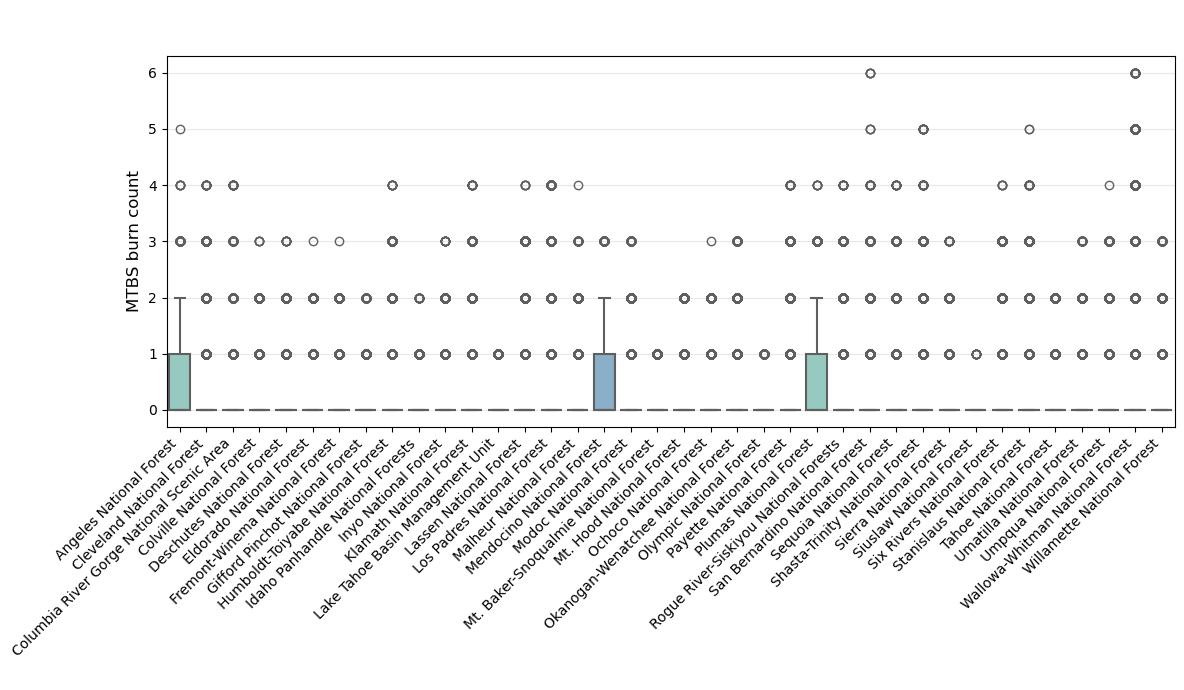


Summary statistics per polygon:
                                            mean    std  min  25%  50%  75%  \
Polygon                                                                       
Angeles National Forest                    0.306  0.556  0.0  0.0  0.0  1.0   
Cleveland National Forest                  0.095  0.365  0.0  0.0  0.0  0.0   
Columbia River Gorge National Scenic Area  0.071  0.347  0.0  0.0  0.0  0.0   
Colville National Forest                   0.065  0.257  0.0  0.0  0.0  0.0   
Deschutes National Forest                  0.064  0.261  0.0  0.0  0.0  0.0   
Eldorado National Forest                   0.253  0.459  0.0  0.0  0.0  0.0   
Fremont-Winema National Forest             0.115  0.330  0.0  0.0  0.0  0.0   
Gifford Pinchot National Forest            0.019  0.146  0.0  0.0  0.0  0.0   
Humboldt-Toiyabe National Forest           0.012  0.119  0.0  0.0  0.0  0.0   
Idaho Panhandle National Forests           0.018  0.133  0.0  0.0  0.0  0.0   
Inyo National Fores

In [7]:
raster_path = r"C:\Users\taohuang\Downloads\mtbs_perimeter_data\mtbs_overlap_count_500m.tif"  
ylab = "MTBS burn count"
shapefile_path =  r"C:\Users\taohuang\Downloads\westcoast_forests.shp" #"data/sample_polygons.shp"  # Your polygons

# Optional: give nice names using a column in your shapefile 
label_column = 'FORESTNAME'   # e.g., 'Plot_ID', 'Field', 'Zone', etc. Change accordingly!

# -----------------------------
# 2. Read data
# -----------------------------
gdf = gpd.read_file(shapefile_path)

with rasterio.open(raster_path) as src:
    raster_crs = src.crs
    nodata = src.nodata

# Reproject polygons to raster CRS if needed
if gdf.crs != raster_crs:
    gdf = gdf.to_crs(raster_crs)

# -----------------------------
# 3. Extract values for each polygon
# -----------------------------
data_for_plotting = []

with rasterio.open(raster_path) as src:
    for idx, row in gdf.iterrows():
        try:
            # Crop and mask raster to polygon
            geom = [mapping(row.geometry)]
            out_image, _ = mask(src, geom, crop=True, filled=True, nodata=nodata)
            
            # Extract values (assuming single band; change [0] for multi-band)
            values = out_image[0].ravel()
            
            # Remove nodata and NaN
            if nodata is not None:
                values = values[values != nodata]
            values = values[np.isfinite(values)]
            
            # Get label for this polygon
            label = row[label_column] if label_column in row else f"Poly_{idx}"
            
            # Append to list for plotting
            if len(values) > 0:
                for val in values:
                    data_for_plotting.append({"Polygon": label, "Value": val})
                    
        except Exception as e:
            print(f"Polygon {idx} failed: {e}")

# Convert to DataFrame
df = pd.DataFrame(data_for_plotting)


# Step 1: Compute median per group
medians = df.groupby('Polygon')['Value'].median()   # change 'category' and 'value' to your column names

# Step 2: Get the order (ascending or descending)
order = medians.sort_values(ascending=True).index

# -----------------------------
# 4. Plot boxplot (or violinplot)
# -----------------------------
plt.figure(figsize=(12, 7))

# Option A: Classic boxplot
sns.boxplot(x="Polygon", y="Value", data=df, palette="Set3", linewidth=1.5, order = order)

# Option B: Violinplot (uncomment to use instead)
# sns.violinplot(x="Polygon", y="Value", data=df, palette="muted", inner="quartile")

# Option C: Boxplot + swarmplot (shows individual points)
# sns.boxplot(x="Polygon", y="Value", data=df, palette="Set3", whis=1.5)
# sns.swarmplot(x="Polygon", y="Value", data=df, color="black", alpha=0.6, size=3)

plt.title(" ", fontsize=16, pad=20)
plt.xlabel(" ", fontsize=12)
plt.ylabel(ylab, fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# -----------------------------
# 5. (Optional) Save summary statistics
# -----------------------------
summary = df.groupby("Polygon")["Value"].describe()[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
print("\nSummary statistics per polygon:")
print(summary.round(3))


C:\Users\taohuang\AppData\Local\Temp\ipykernel_48344\4288681741.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Polygon", y="Value", data=df, palette="Set3", linewidth=1.5, order = order)


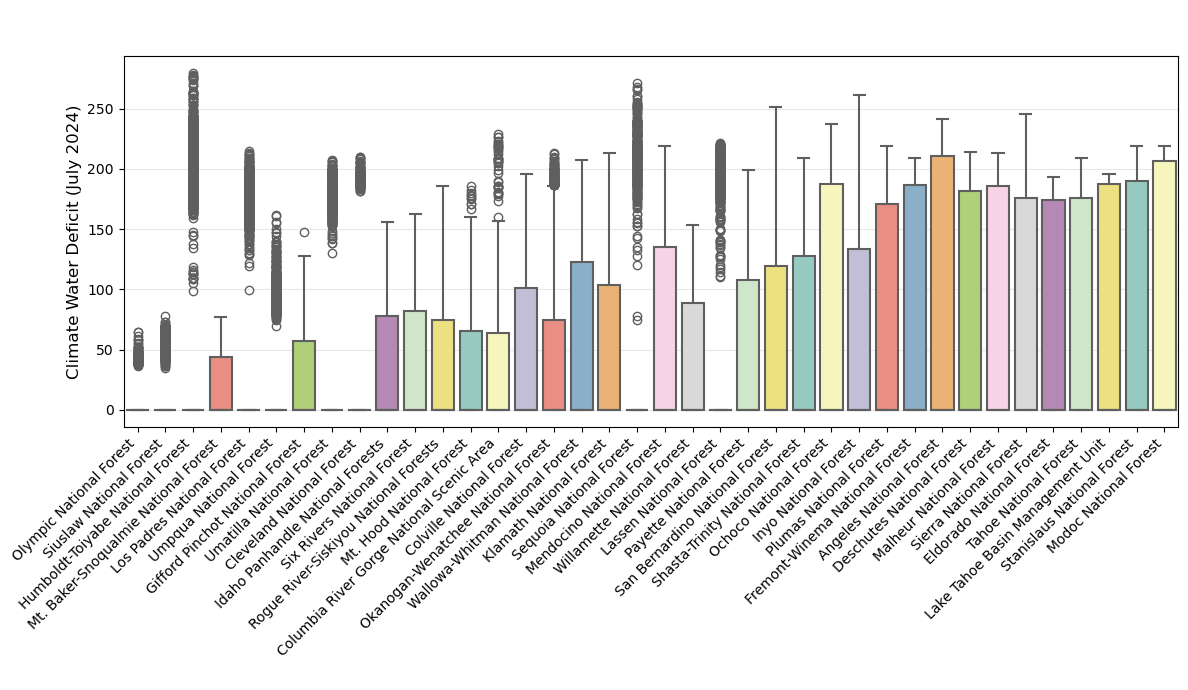


Summary statistics per polygon:
                                             mean      std  min  25%  50%  \
Polygon                                                                     
Angeles National Forest                    67.964  100.904  0.0  0.0  0.0   
Cleveland National Forest                  26.281   66.185  0.0  0.0  0.0   
Columbia River Gorge National Scenic Area  37.832   69.796  0.0  0.0  0.0   
Colville National Forest                   39.663   62.700  0.0  0.0  0.0   
Deschutes National Forest                  70.050   88.072  0.0  0.0  0.0   
Eldorado National Forest                   78.407   87.106  0.0  0.0  0.0   
Fremont-Winema National Forest             67.727   90.043  0.0  0.0  0.0   
Gifford Pinchot National Forest            25.000   31.639  0.0  0.0  0.0   
Humboldt-Toiyabe National Forest           15.614   54.716  0.0  0.0  0.0   
Idaho Panhandle National Forests           27.444   43.496  0.0  0.0  0.0   
Inyo National Forest                       

In [5]:
raster_path = r"C:\Users\taohuang\Downloads\def_last_layer_6.tif"  
ylab = "Climate Water Deficit (July 2024)"
shapefile_path =  r"C:\Users\taohuang\Downloads\westcoast_forests.shp" #"data/sample_polygons.shp"  # Your polygons

# Optional: give nice names using a column in your shapefile 
label_column = 'FORESTNAME'   # e.g., 'Plot_ID', 'Field', 'Zone', etc. Change accordingly!

# -----------------------------
# 2. Read data
# -----------------------------
gdf = gpd.read_file(shapefile_path)

with rasterio.open(raster_path) as src:
    raster_crs = src.crs
    nodata = src.nodata

# Reproject polygons to raster CRS if needed
if gdf.crs != raster_crs:
    gdf = gdf.to_crs(raster_crs)

# -----------------------------
# 3. Extract values for each polygon
# -----------------------------
data_for_plotting = []

with rasterio.open(raster_path) as src:
    for idx, row in gdf.iterrows():
        try:
            # Crop and mask raster to polygon
            geom = [mapping(row.geometry)]
            out_image, _ = mask(src, geom, crop=True, filled=True, nodata=nodata)
            
            # Extract values (assuming single band; change [0] for multi-band)
            values = out_image[0].ravel()
            
            # Remove nodata and NaN
            if nodata is not None:
                values = values[values != nodata]
            values = values[np.isfinite(values)]
            
            # Get label for this polygon
            label = row[label_column] if label_column in row else f"Poly_{idx}"
            
            # Append to list for plotting
            if len(values) > 0:
                for val in values:
                    data_for_plotting.append({"Polygon": label, "Value": val})
                    
        except Exception as e:
            print(f"Polygon {idx} failed: {e}")

# Convert to DataFrame
df = pd.DataFrame(data_for_plotting)

# Step 1: Compute median per group
#medians = df.groupby('Polygon')['Value'].median()    
means = df.groupby('Polygon')['Value'].mean()  

# Step 2: Get the order (ascending or descending)
#order = medians.sort_values(ascending=True).index
order = means.sort_values(ascending=True).index

# -----------------------------
# 4. Plot boxplot (or violinplot)
# -----------------------------
plt.figure(figsize=(12, 7))

# Option A: Classic boxplot
sns.boxplot(x="Polygon", y="Value", data=df, palette="Set3", linewidth=1.5, order = order)

# Option B: Violinplot (uncomment to use instead)
#sns.violinplot(x="Polygon", y="Value", data=df, palette="muted", inner="quartile")

# Option C: Boxplot + swarmplot (shows individual points)
# sns.boxplot(x="Polygon", y="Value", data=df, palette="Set3", whis=1.5)
# sns.swarmplot(x="Polygon", y="Value", data=df, color="black", alpha=0.6, size=3)

plt.title(" ", fontsize=16, pad=20)
plt.xlabel(" ", fontsize=12)
plt.ylabel(ylab, fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# -----------------------------
# 5. (Optional) Save summary statistics
# -----------------------------
summary = df.groupby("Polygon")["Value"].describe()[['mean', 'std', 'min', '25%', '50%', '75%', 'max']]
print("\nSummary statistics per polygon:")
print(summary.round(3))